In [ ]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Estadísticas
import scipy
from scipy import stats

# Para partir datos entrenamiento y validación
from sklearn.model_selection import train_test_split

# Modelo de Clasificación
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

# Graficos ggplot similar a R
#from plotnine import *  # Antes instalar > py_install("plotnine") desde R o Python

# tablas de frecuencias
#import sidetable as stb

In [ ]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/heart_2020_cleaned.csv")
datos

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
print("Observaciones y variables: ", datos.shape)

Observaciones y variables:  (319795, 18)


In [ ]:
print("Columnas y tipo de dato")
# datos.columns

Columnas y tipo de dato


In [ ]:
datos.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [ ]:
frecuencia = (datos.groupby("HeartDisease").agg(frecuencia=("HeartDisease","count")).reset_index())

frecuencia

,HeartDisease,frecuencia
0,No,292422
1,Yes,27373


<BarContainer object of 2 artists>

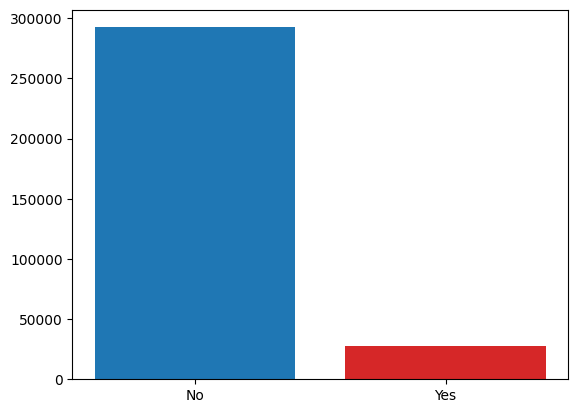

In [ ]:
fig, ax = plt.subplots()
# Colores
bar_labels = ['No', 'Yes']
bar_colors = ['tab:blue', 'tab:red']

#frecuencia['frecuencia'].plot(kind="bar")
ax.bar(frecuencia['HeartDisease'], frecuencia['frecuencia'], label=bar_labels, color=bar_colors)

In [ ]:
ax.set_ylabel('Frecuencia')
ax.set_title('Daños al Corazón')
ax.legend(title='Daño')

plt.show()
# plt.gcf().clear()

array([[<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'PhysicalHealth'}>],
       [<Axes: title={'center': 'MentalHealth'}>,
        <Axes: title={'center': 'SleepTime'}>]], dtype=object)

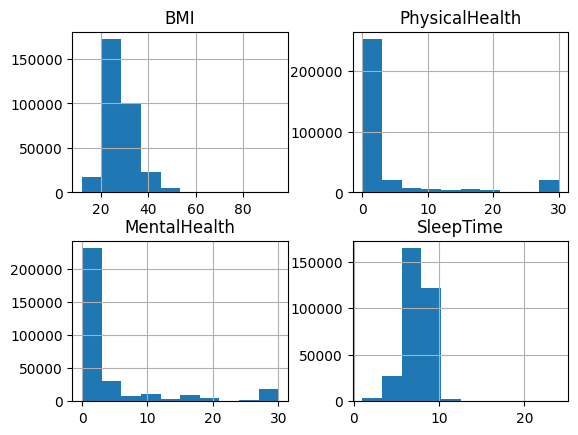

In [ ]:
datos[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].hist()

<BarContainer object of 2 artists>

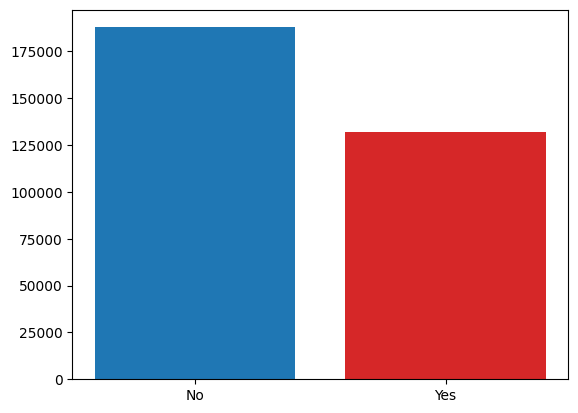

In [ ]:
frecuencia = (datos.groupby("Smoking").agg(frecuencia=("Smoking", "count")).reset_index())

fig, ax = plt.subplots()
# Colores
bar_labels = ['No', 'Yes']
bar_colors = ['tab:blue', 'tab:red']

#frecuencia['frecuencia'].plot(kind="bar")
ax.bar(frecuencia['Smoking'], frecuencia['frecuencia'], label=bar_labels, color=bar_colors)

In [ ]:
datos['HeartDisease01'] = np.where(datos ['HeartDisease']== "Yes", 1, 0)


In [ ]:
datos = datos.drop("HeartDisease", axis='columns')

In [ ]:
datos.columns.values

array(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'HeartDisease01'], dtype=object)

In [ ]:
print("Observaciones y variables: ", datos.shape)

Observaciones y variables:  (319795, 18)


In [ ]:
print("Columnas y tipo de dato")
# datos.columns

Columnas y tipo de dato


In [ ]:
datos.dtypes

BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
HeartDisease01        int64
dtype: object

In [ ]:
datos_dummis = pd.get_dummies(datos, drop_first = True)
datos_dummis

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease01,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1,1,0,0,1,1,...,1,0,0,1,0,0,0,1,0,0
319791,29.84,0.0,0.0,5.0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
319792,24.24,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
319793,32.81,0.0,0.0,12.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
datos_dummis.dtypes

BMI                                 float64
PhysicalHealth                      float64
MentalHealth                        float64
SleepTime                           float64
HeartDisease01                        int64
Smoking_Yes                           uint8
AlcoholDrinking_Yes                   uint8
Stroke_Yes                            uint8
DiffWalking_Yes                       uint8
Sex_Male                              uint8
AgeCategory_25-29                     uint8
AgeCategory_30-34                     uint8
AgeCategory_35-39                     uint8
AgeCategory_40-44                     uint8
AgeCategory_45-49                     uint8
AgeCategory_50-54                     uint8
AgeCategory_55-59                     uint8
AgeCategory_60-64                     uint8
AgeCategory_65-69                     uint8
AgeCategory_70-74                     uint8
AgeCategory_75-79                     uint8
AgeCategory_80 or older               uint8
Race_Asian                      

In [ ]:
X_entrena, X_valida, Y_entrena, Y_valida = train_test_split(datos_dummis.drop(columns = "HeartDisease01"), datos_dummis['HeartDisease01'],train_size = 0.80,  random_state = 1307)

In [ ]:
X_entrena

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
314242,26.57,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
41135,35.43,0.0,0.0,6.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
283656,25.86,0.0,15.0,9.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
59984,26.32,0.0,20.0,6.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
288642,21.80,0.0,0.0,6.0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57268,22.30,3.0,7.0,7.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
78242,37.20,0.0,0.0,9.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
147259,27.12,7.0,30.0,6.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
312454,45.61,30.0,30.0,6.0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_valida

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
62602,25.82,0.0,0.0,8.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
103471,29.86,0.0,0.0,5.0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
257770,29.16,0.0,15.0,8.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
72406,27.50,0.0,7.0,8.0,1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
59660,15.83,0.0,0.0,4.0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14384,27.41,3.0,0.0,7.0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
147417,32.61,30.0,30.0,6.0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
158675,21.14,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
46135,28.19,0.0,0.0,8.0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0


In [ ]:
modelo_rlog = linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=1000)
modelo_rlog.fit(X_entrena, Y_entrena)

LogisticRegression(max_iter=1000)

In [ ]:
print(modelo_rlog.score(X_entrena, Y_entrena))

0.9156373614346691


In [ ]:
predicciones_rlog = modelo_rlog.predict(X_valida)
print(predicciones_rlog)

[0 0 0 ... 0 0 0]


In [ ]:
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(HeartDisease_Real = Y_valida)
comparaciones = comparaciones.assign(HeartDisease_Pred = predicciones_rlog.flatten().tolist())
print(comparaciones)

          BMI  PhysicalHealth  MentalHealth  SleepTime  Smoking_Yes  \
62602   25.82             0.0           0.0        8.0            0   
103471  29.86             0.0           0.0        5.0            1   
257770  29.16             0.0          15.0        8.0            1   
72406   27.50             0.0           7.0        8.0            1   
59660   15.83             0.0           0.0        4.0            1   
...       ...             ...           ...        ...          ...   
14384   27.41             3.0           0.0        7.0            1   
147417  32.61            30.0          30.0        6.0            0   
158675  21.14             0.0           0.0        6.0            0   
46135   28.19             0.0           0.0        8.0            0   
114425  34.20             0.0           0.0        7.0            0   

        AlcoholDrinking_Yes  Stroke_Yes  DiffWalking_Yes  Sex_Male  \
62602                     0           0                0         0   
103471 

In [ ]:
print(confusion_matrix(comparaciones['HeartDisease_Real'], comparaciones['HeartDisease_Pred']))

[[58074   471]
 [ 4830   584]]


In [ ]:
print(classification_report(comparaciones['HeartDisease_Real'], comparaciones['HeartDisease_Pred']))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58545
           1       0.55      0.11      0.18      5414

    accuracy                           0.92     63959
   macro avg       0.74      0.55      0.57     63959
weighted avg       0.89      0.92      0.89     63959



In [ ]:
accuracy = accuracy_score(
    y_true = comparaciones['HeartDisease_Real'],
    y_pred = comparaciones['HeartDisease_Pred'],
    normalize = True
    )
print(f"El estadístico accuracy es: {accuracy}")

El estadístico accuracy es: 0.9171187792179365


In [ ]:
# Se crea un diccionario
registro = {'BMI': 38, 'PhysicalHealth': 2, 'MentalHealth': 5, 'SleepTime' : 12, 'Smoking_Yes' : 1, 'AlcoholDrinking_Yes' : 1, 'Stroke_Yes' : 1, 'DiffWalking_Yes': 1, 'Sex_Male': 1,
'AgeCategory_25-29' : 0, 'AgeCategory_30-34' : 0,
'AgeCategory_35-39' : 0, 'AgeCategory_40-44' : 0,
'AgeCategory_45-49' : 0, 'AgeCategory_50-54' : 0,
'AgeCategory_55-59' : 0, 'AgeCategory_60-64' : 0,
'AgeCategory_65-69' : 0, 'AgeCategory_70-74': 1,
'AgeCategory_75-79' : 0, 'AgeCategory_80 or older' : 0,         'Race_Asian' : 0, 'Race_Black' : 1, 'Race_Hispanic' : 0,
'Race_Other' : 0, 'Race_White' : 0,
'Diabetic_No, borderline diabetes' : 0, 'Diabetic_Yes' : 1,
'Diabetic_Yes (during pregnancy)' : 0,
'PhysicalActivity_Yes' : 0, 'GenHealth_Fair' : 1,
'GenHealth_Good' : 0, 'GenHealth_Poor' : 0,
'GenHealth_Very good' : 0, 'Asthma_Yes' : 1, 'KidneyDisease_Yes':1, 'SkinCancer_Yes': 0}
persona = pd.DataFrame()
persona = persona.append(registro, ignore_index=True)
persona

<ipython-input-44-3ae3c82aab13>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  persona = persona.append(registro, ignore_index=True)


,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,38,2,5,12,1,1,1,1,1,0,...,1,0,0,1,0,0,0,1,1,0


In [ ]:
prediccion = modelo_rlog.predict(persona)
print(prediccion)

[1]
